In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline 

In [3]:
dataset = pd.read_csv('loan_approval_dataset.csv')

In [4]:
dataset

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [5]:
dataset.drop(['loan_id'], axis = 1, inplace = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


<Figure size 576x432 with 0 Axes>

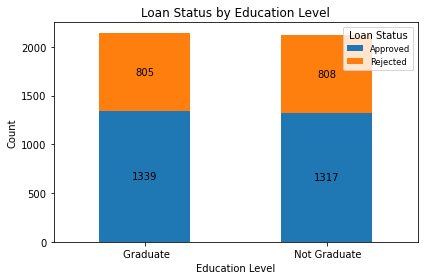

In [7]:
dataset.columns = dataset.columns.str.strip()
if 'education' in dataset.columns and 'loan_status' in dataset.columns:
    education_loan_status_counts = dataset.groupby(['education', 'loan_status']).size().unstack()
    plt.figure(figsize=(8, 6))
    ax = education_loan_status_counts.plot(kind='bar', stacked=True) 
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'], fontsize='small') 
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

<Figure size 576x432 with 0 Axes>

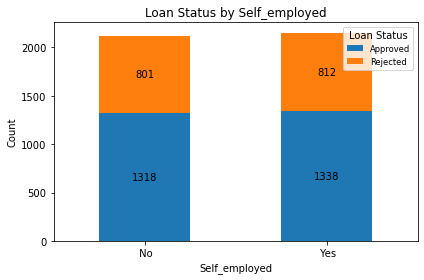

In [8]:
dataset.columns = dataset.columns.str.strip()
if 'self_employed' in dataset.columns and 'loan_status' in dataset.columns:
    education_loan_status_counts = dataset.groupby(['self_employed', 'loan_status']).size().unstack()
    plt.figure(figsize=(8, 6))
    ax = education_loan_status_counts.plot(kind='bar', stacked=True) 
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    plt.title('Loan Status by Self_employed')
    plt.xlabel('Self_employed')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'], fontsize='small') 
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

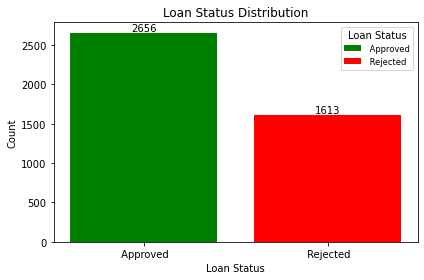

In [9]:
loan_status_counts = dataset['loan_status'].value_counts()
plt.figure(figsize=(6, 4))
bars = plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(bars, loan_status_counts.index, title='Loan Status', loc='upper right', fontsize='small') 
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['self_employed'] = le.fit_transform(dataset['self_employed'])
dataset['loan_status'] = le.fit_transform(dataset['loan_status'])
dataset['education'] = le.fit_transform(dataset['education'])

In [11]:
dataset

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


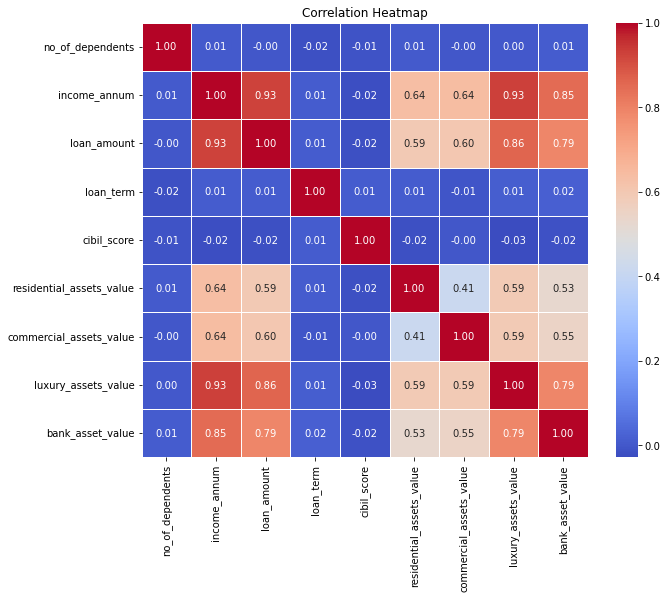

In [12]:
numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
dataset.drop(['education','self_employed'],axis=1,inplace=True)

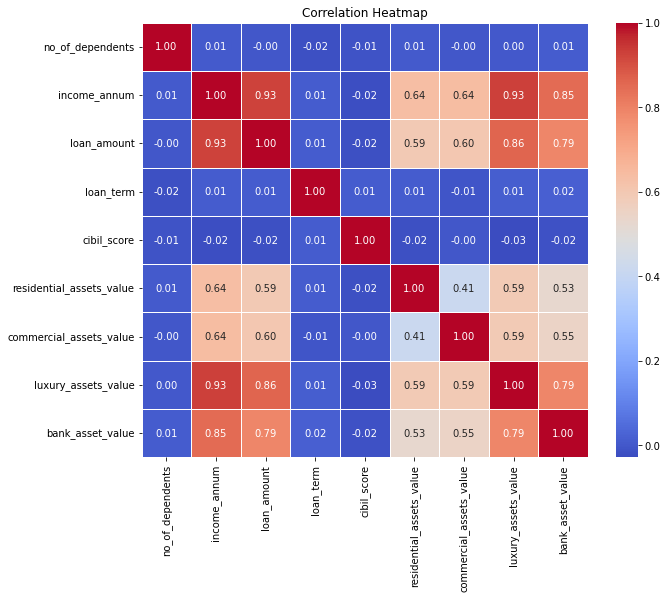

In [14]:
numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\neigenvalues \n%s' % eigen_vals)


eigenvalues 
[4.49030309 1.02577064 0.97337629 1.00330491 0.57919077 0.50620947
 0.04325707 0.13771232 0.24351165]


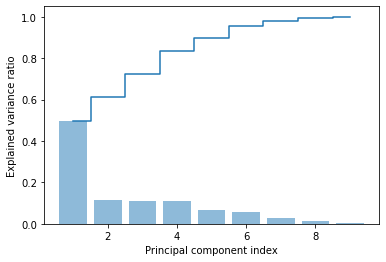

In [18]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,10), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,10), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

In [19]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
    for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((np.abs(eigen_pairs[0][1][:, np.newaxis]),
               np.abs(eigen_pairs[1][1][:, np.newaxis]),
               np.abs(eigen_pairs[2][1][:, np.newaxis])))
np.set_printoptions(precision=5, suppress=True)
print('Matrix W:\n', w)

Matrix W:
 [[0.00191 0.71703 0.06579]
 [0.45914 0.00401 0.00067]
 [0.44009 0.00276 0.01091]
 [0.00417 0.66551 0.35936]
 [0.00982 0.20688 0.92896]
 [0.33967 0.0109  0.02183]
 [0.3394  0.00142 0.05177]
 [0.43931 0.00493 0.01538]
 [0.41453 0.00047 0.00687]]


In [20]:
X_train_pca = X_train_std.dot(w)

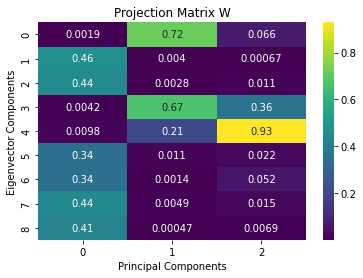

In [21]:
sns.heatmap(w, cmap='viridis', annot=True)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvector Components')
plt.title('Projection Matrix W')
plt.show()

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import randint, uniform
import numpy as np
models_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': np.logspace(-3, 3, 7),
            'penalty': ['l1', 'l2']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': randint(1, 20),
            'criterion': ['gini', 'entropy']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': randint(10, 200),
            'max_depth': randint(1, 20),
            'bootstrap': [True, False]
        }
    }
}

best_models = {}
for model_name, mp in models_params.items():
    random_search = RandomizedSearchCV(mp['model'], mp['params'], cv=5, n_iter=10, n_jobs=-1, random_state=1)
    random_search.fit(X_train_pca, y_train)
    best_models[model_name] = random_search.best_estimator_
for model_name, best_model in best_models.items():
    print(f'{model_name}: {best_model}')

C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

LogisticRegression: LogisticRegression()
DecisionTreeClassifier: DecisionTreeClassifier(criterion='entropy', max_depth=6)
RandomForestClassifier: RandomForestClassifier(max_depth=10, n_estimators=106)


In [23]:
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
classifier = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs', class_weight='balanced')
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {score:.3f}")

Confusion Matrix:
[[466  65]
 [ 36 287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       531
           1       0.82      0.89      0.85       323

    accuracy                           0.88       854
   macro avg       0.87      0.88      0.88       854
weighted avg       0.89      0.88      0.88       854


Accuracy: 0.882


In [25]:
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=6, class_weight='balanced')
classifier2.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, random_state=1)

In [26]:
y_pred = classifier2.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {score:.2f}")

Confusion Matrix:
[[468  63]
 [ 34 289]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       531
           1       0.82      0.89      0.86       323

    accuracy                           0.89       854
   macro avg       0.88      0.89      0.88       854
weighted avg       0.89      0.89      0.89       854


Accuracy: 0.89


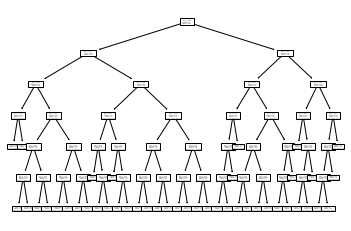

In [27]:
from sklearn import tree
tree.plot_tree(classifier2)
plt.show()

In [28]:
classifier3 = RandomForestClassifier(n_estimators = 143, criterion = 'entropy', random_state = 1, max_depth=10, class_weight='balanced')
classifier3.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=143, random_state=1)

In [29]:
y_pred = classifier3.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {score:.2f}")

Confusion Matrix:
[[454  77]
 [ 24 299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       531
           1       0.80      0.93      0.86       323

    accuracy                           0.88       854
   macro avg       0.87      0.89      0.88       854
weighted avg       0.89      0.88      0.88       854


Accuracy: 0.88


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
clf1 = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=6, class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators = 143, criterion = 'entropy', random_state = 1, max_depth=10, class_weight='balanced')
clf_labels = ['Logistic Regression', 'Decision Tree', 'Random Forest']
print('10-fold cross-validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train_pca, y=y_train, cv=50, scoring='roc_auc') 
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross-validation:

ROC AUC: 0.96 (+/- 0.02) [Logistic Regression]
ROC AUC: 0.95 (+/- 0.02) [Decision Tree]
ROC AUC: 0.96 (+/- 0.02) [Random Forest]


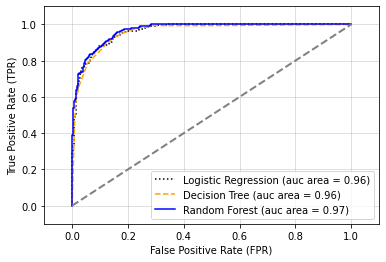

In [31]:
from sklearn.metrics import roc_curve, auc
all_clf = [clf1, clf2, clf3]
colors = ['black', 'orange', 'blue']
linestyles = [':', '--', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train_pca, y_train).predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc area = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

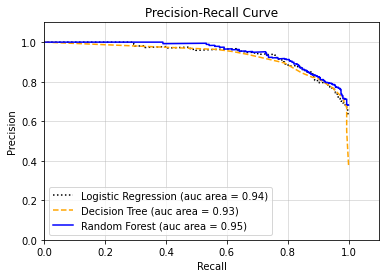

In [32]:
from sklearn.metrics import precision_recall_curve, auc
all_clf = [clf1, clf2, clf3]
colors = ['black', 'orange', 'blue']
linestyles = [':', '--', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train_pca, y_train).predict_proba(X_test_pca)[:, 1]
    precision, recall, _ = precision_recall_curve(y_true=y_test, probas_pred=y_pred)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, color=clr, linestyle=ls, label='%s (auc area = %0.2f)' % (label, pr_auc))
plt.legend(loc='lower left')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [33]:
from sklearn.svm import SVC
classifier4 = SVC(kernel='linear', class_weight='balanced', random_state=1)
classifier4.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

In [34]:
y_pred = classifier4.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {score:.2f}")

Confusion Matrix:
[[460  71]
 [ 30 293]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       531
           1       0.80      0.91      0.85       323

    accuracy                           0.88       854
   macro avg       0.87      0.89      0.88       854
weighted avg       0.89      0.88      0.88       854


Accuracy: 0.88


In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
               'kernel': ['linear']},
              {'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator=SVC(class_weight='balanced', kernel='linear', random_state=1),
                  param_grid=param_grid,
                  scoring='precision',
                  cv=2,
                 n_jobs=-1)
gs.fit(X_train_pca, y_train)
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X_train_pca, y_train, scoring='precision', cv=5, n_jobs=-1)
print(f'Precision: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

Precision: 0.800 +/- 0.400


In [36]:
from sklearn.svm import SVC
classifier5 = SVC(kernel='rbf', gamma=1000.0, class_weight='balanced', random_state=1)
classifier5.fit(X_train_pca, y_train)
y_pred = classifier5.predict(X_test_pca)

In [37]:
y_pred = classifier5.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {score:.2f}")

Confusion Matrix:
[[531   0]
 [318   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       531
           1       1.00      0.02      0.03       323

    accuracy                           0.63       854
   macro avg       0.81      0.51      0.40       854
weighted avg       0.77      0.63      0.49       854


Accuracy: 0.63


In [38]:
from sklearn.ensemble import VotingClassifier
clf4 = SVC(kernel='rbf', gamma=1000.0, class_weight='balanced', random_state=1, probability=True)
mv_clf = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3), ('clf4', clf4)], voting='soft')
clf_labels2 = ['Logistic Regression', 'Decision Tree', 'Random Forest','SCV']
clf_labels2 += ['Majority Voting']
all_clf = [clf1, clf2, clf3, clf4, mv_clf]
for clf, label in zip(all_clf, clf_labels2):
    scores = cross_val_score(estimator=clf,
                             X=X_train_pca,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

ROC AUC: 0.96 (+/- 0.01) [Logistic Regression]
ROC AUC: 0.95 (+/- 0.01) [Decision Tree]
ROC AUC: 0.96 (+/- 0.01) [Random Forest]
ROC AUC: 0.77 (+/- 0.02) [SCV]
ROC AUC: 0.97 (+/- 0.01) [Majority Voting]


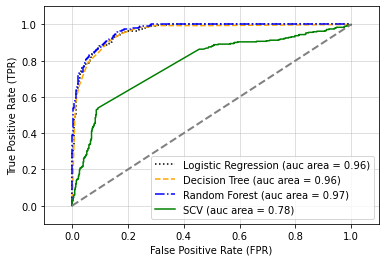

In [39]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels2, colors, linestyles):
    y_pred = clf.fit(X_train_pca, y_train).predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc area = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

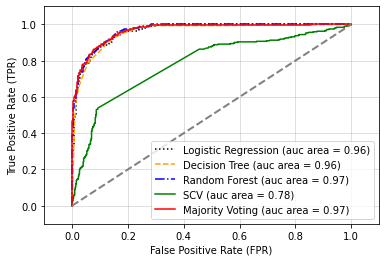

In [40]:
colors = ['black', 'orange', 'blue', 'green', 'red']
linestyles = [':', '--', '-.', '-', '-'] 
for clf, label, clr, ls in zip(all_clf, clf_labels2, colors, linestyles):
    y_pred = clf.fit(X_train_pca, y_train).predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc area = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [41]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train_pca, label=y_train)
D_test = xgb.DMatrix(X_test_pca, label=y_test)

In [42]:
clf5 = xgb.XGBClassifier()
parameters = {
     "eta": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight": [ 1, 3, 5, 7 ],
     "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ]
     }

gs2 = GridSearchCV(clf5,
                    parameters, n_jobs=-1,
                    scoring="neg_log_loss",
                    cv=3)

gs2.fit(X_train_pca, y_train)
best_params = gs2.best_params_
print(best_params)

{'colsample_bytree': 0.7, 'eta': 0.1, 'gamma': 0.3, 'max_depth': 4, 'min_child_weight': 1}


In [43]:
classifier6 = xgb.XGBClassifier(colsample_bytree=0.7, eta=0.1, gamma=0.3, max_depth=4, min_child_weight=1)
classifier6.fit(X_train_pca, y_train)
y_pred = classifier6.predict(X_test_pca)

In [44]:
y_pred = classifier6.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {score:.2f}")

Confusion Matrix:
[[480  51]
 [ 44 279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       531
           1       0.85      0.86      0.85       323

    accuracy                           0.89       854
   macro avg       0.88      0.88      0.88       854
weighted avg       0.89      0.89      0.89       854


Accuracy: 0.89
